Implementation of Infinite Mixture Models using Dirichlet Process taken from http://blog.echen.me/2012/03/20/infinite-mixture-models-with-nonparametric-bayes-and-the-dirichlet-process/

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
sns.set(color_codes=True)

In [4]:
# Generate table assignments for `num_customers` customers, according to
# a Chinese Restaurant Process with dispersion parameter `alpha`.
# returns an array of integer table assignments
def chinese_restaurant_process(num_customers, alpha):
    if num_customers <= 0:
        return []
    table_assignments = [1] # first customer sits at table 1
    next_open_table = 2 # index of the next empty table
    # Now generate table assignments for the rest of the customers.
    for i in range(1,num_customers):
        rand_p = np.random.rand()
        if (rand_p < alpha*1.0/(alpha + i)):
            # Customer sits at new table
            table_assignments.append(next_open_table)
            next_open_table += 1
        else:
            # Customer sites at an exiting table
            # He chooses which table to sit at by giving equal weight to each
            # customer already sitting at a table
            rand_index = np.random.random_integers(0,i-1)
            #print i, len(table_assignments), rand_index, rand_p, alpha*1.0/(alpha + i), table_assignments
            which_table = table_assignments[rand_index]
            table_assignments.append(which_table)
    return table_assignments

In [5]:
def get_points(N=10, alpha_max=1000, runs_per_alpha=10):
    points = []
    for alpha in range(1,alpha_max):
        #print "Alpha: ", alpha
        max_groups = []
        for i in range(runs_per_alpha):
            distribution = chinese_restaurant_process(num_customers = N, alpha = alpha)
            max_groups.append(max(distribution))
            #print "Run[%s]:\t%s" %(i, distribution)
        mean_groups = np.mean(max_groups)
        #print "Alpha: %s, Mean: %s" % (alpha, mean_groups)
        points.append([alpha, mean_groups])
    return np.array(points)

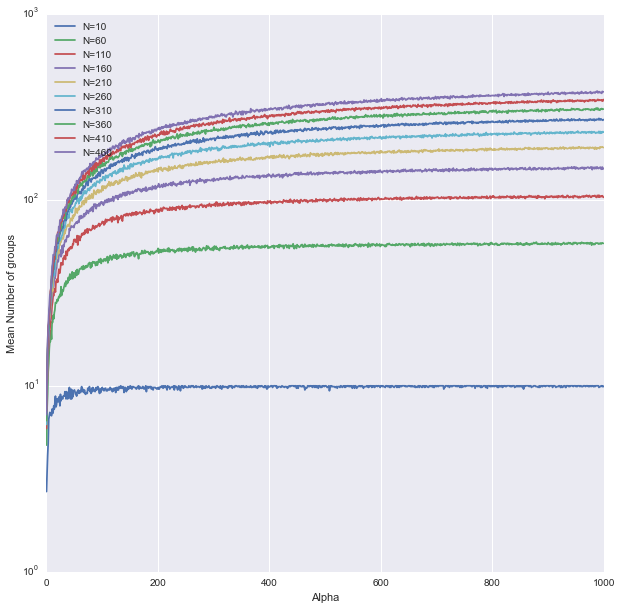

In [6]:
plt.figure(figsize=[10,10])
for N in range(10, 500, 50):
    points = get_points(N)
    plt.plot(points[:,0], points[:, 1], '-', label="N={}".format(N))
plt.xlabel("Alpha")
plt.ylabel("Mean Number of groups")
plt.yscale('log')
plt.legend(loc='upper left')
plt.show()

In [2]:
# Poyla Urn Process
# Draw `num_balls` colored balls according to a Polya Urn Model
# with a specified base color distribution and dispersion parameter
# `alpha`.
#
# returns an array of ball colors
def polya_urn_model(base_color_distribution, num_balls, alpha):
    if num_balls <= 0:
        return []
    balls_in_urn = []
    for i in range(num_balls):
        urn_size = len(balls_in_urn)
        if np.random.rand() < alpha*1.0 / (alpha + urn_size):
            # Draw a new color, put a ball of this color in the urn.
            new_color = base_color_distribution()
            balls_in_urn.append(new_color)
        else:
            # Draw a ball from the urn, add another ball of the same color.
            ball = balls_in_urn[np.random.random_integers(0,urn_size-1)]
            balls_in_urn.append(ball)
    return np.array(balls_in_urn)


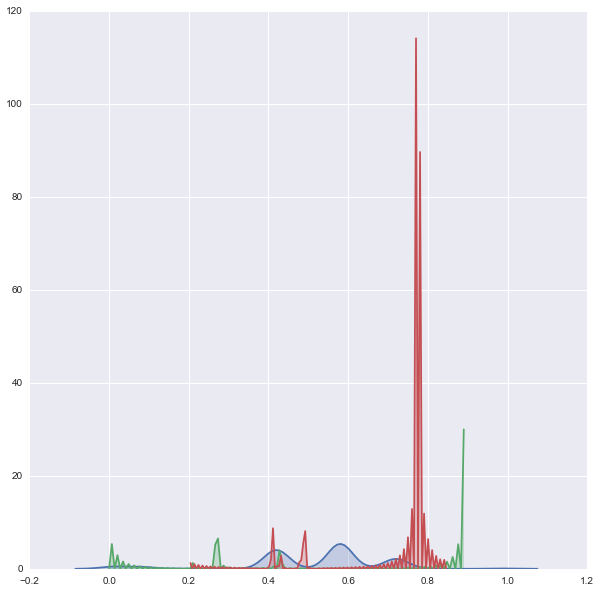

In [3]:
unit_uniform = lambda: int(np.random.rand()*100)/100.0
plt.figure(figsize=[10,10])
for i in range(3):
    X = polya_urn_model(unit_uniform, num_balls = 1000, alpha = 1)
    #print X
    sns.kdeplot(X, shade=True);

In [7]:
sns.__version__

'0.6.0'